In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

 
print('Numpy Version :', np.__version__)
print('Pandas Version :', pd.__version__)
print('Seaborn Version :', sns.__version__)

Numpy Version : 1.20.1
Pandas Version : 1.2.2
Seaborn Version : 0.11.0


In [4]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
7930,7931,C,Road,3,1,242,10,high,M,9,5151,1
10800,10801,D,Road,5,5,253,6,low,F,1,1300,0
9400,9401,C,Ship,6,4,285,4,medium,M,4,1244,1
3840,3841,D,Flight,4,2,153,2,medium,F,4,4069,1
3491,3492,F,Ship,4,2,223,3,medium,M,3,5121,0


In [6]:
df = df.drop(columns = 'ID')

In [7]:
df_disc_applied = df.copy()
df_disc_applied['Discount_offered'] = [1/100] * df['Discount_offered']
df_disc_applied['cashback'] = df['Cost_of_the_Product'] * df['Discount_offered']
df_disc_applied['cashback'] = [1/100] * df_disc_applied['cashback'] 
df_disc_applied['cost_after_discount'] = df['Cost_of_the_Product'] - df_disc_applied['cashback']

In [8]:
df_disc_applied.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
8594,A,Ship,2,4,245,2,medium,F,0.10,5389,0,24.50,220.50
9047,F,Flight,3,2,226,3,low,F,0.05,5484,0,11.30,214.70
6988,C,Flight,4,5,133,3,high,F,0.08,5653,1,10.64,122.36
9502,C,Ship,3,4,193,6,low,M,0.02,5584,0,3.86,189.14
7549,F,Flight,3,2,150,3,high,M,0.02,5502,0,3.00,147.00


In [9]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  object 
 1   Mode_of_Shipment     10999 non-null  object 
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  int64  
 6   Product_importance   10999 non-null  object 
 7   Gender               10999 non-null  object 
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
 11  cashback             10999 non-null  float64
 12  cost_after_discount  10999 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [10]:
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N', 'cashback','cost_after_discount']
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [11]:
# dua kolom baru diubah ke int64 agar bentuknya bukan lagi float
df_disc_applied['cashback'] = df_disc_applied['cashback'].apply(np.int64)
df_disc_applied['cost_after_discount'] = df_disc_applied['cost_after_discount'].apply(np.int64)
df_disc_applied['Discount_offered'] = df_disc_applied['Discount_offered'].apply(np.int64)

In [12]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
 11  cashback             10999 non-null  int64 
 12  cost_after_discount  10999 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [13]:
df_disc_applied.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.0,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,0.0,3634.016729,0.596691,26.547686,182.682426
std,1.141490,1.413603,48.063272,1.522860,0.0,1635.377251,0.490584,33.001073,56.901337
min,2.000000,1.000000,96.000000,2.000000,0.0,1001.000000,0.000000,0.000000,36.000000
25%,3.000000,2.000000,169.000000,3.000000,0.0,1839.500000,0.000000,7.000000,140.000000
50%,4.000000,3.000000,214.000000,3.000000,0.0,4149.000000,1.000000,14.000000,186.000000
75%,5.000000,4.000000,251.000000,4.000000,0.0,5050.000000,1.000000,25.000000,231.000000
max,7.000000,5.000000,310.000000,10.000000,0.0,7846.000000,1.000000,185.000000,306.000000


In [14]:
df_disc_applied[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## Data Preparation

### Missing Data

In [15]:
df_disc_applied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
 11  cashback             10999 non-null  int64 
 12  cost_after_discount  10999 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Berdasarkan info di atas semua feature memiliki data yang lengkap atau tidak ada yang missing

In [16]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N','cashback','cost_after_discount']

In [17]:
df_disc_applied.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
cashback               0
cost_after_discount    0
dtype: int64

Berdasarkan output di atas tidak ada feature yang memiliki data null

### Duplicated Data

In [18]:
print(df_disc_applied.duplicated().sum()) #1
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment']).sum()) #2
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls']).sum()) #3
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating']).sum()) #4
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product']).sum()) #5
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms']).sum()) #6
print(df_disc_applied.duplicated(subset=['Warehouse_block','Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Weight_in_gms','Reached.on.Time_Y.N']).sum()) #7
print(df_disc_applied.duplicated(subset=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N','cashback','cost_after_discount']).sum())

0
10984
10909
10567
1846
1
1
0


### Outliers

In [19]:
len(df_disc_applied)

10999

Jumlah data adalah 10,999 baris

In [20]:
from scipy import stats

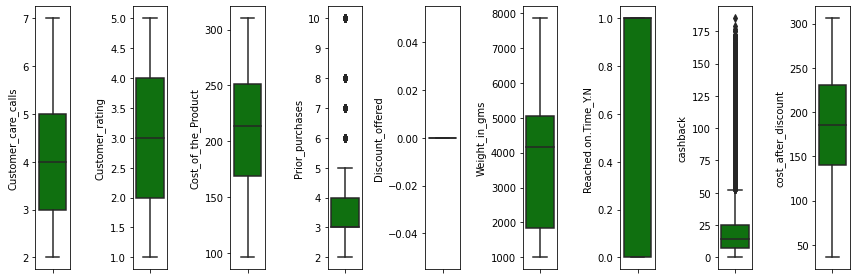

In [21]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y = df_disc_applied[nums[i]], color = 'green', orient = 'v')
  plt.tight_layout()

In [22]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_disc_applied)}')
filter = np.array([True] * len(df_disc_applied))
for col in ['Cost_of_the_Product','Weight_in_gms','cashback']:
    Q1 = df_disc_applied[col].quantile(0.25)
    Q3 = df_disc_applied[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter = ((df_disc_applied[col] >= low_limit) & (df_disc_applied[col] <= high_limit)) & filter
    
df_filtered = df_disc_applied[filter]
print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 9214


In [23]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      9214 non-null   object
 1   Mode_of_Shipment     9214 non-null   object
 2   Customer_care_calls  9214 non-null   int64 
 3   Customer_rating      9214 non-null   int64 
 4   Cost_of_the_Product  9214 non-null   int64 
 5   Prior_purchases      9214 non-null   int64 
 6   Product_importance   9214 non-null   object
 7   Gender               9214 non-null   object
 8   Discount_offered     9214 non-null   int64 
 9   Weight_in_gms        9214 non-null   int64 
 10  Reached.on.Time_Y.N  9214 non-null   int64 
 11  cashback             9214 non-null   int64 
 12  cost_after_discount  9214 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 1007.8+ KB


### Normalization

In [24]:
df_filtered.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.0,9214.000000,9214.000000,9214.000000,9214.000000
mean,4.111027,2.993597,211.418602,3.622205,0.0,3859.365422,0.518559,13.564142,196.884524
std,1.159364,1.411702,48.681230,1.520578,0.0,1648.827257,0.499683,10.055245,48.488206
min,2.000000,1.000000,96.000000,2.000000,0.0,1001.000000,0.000000,0.000000,48.000000
25%,3.000000,2.000000,170.000000,3.000000,0.0,1874.250000,0.000000,6.000000,158.000000
50%,4.000000,3.000000,217.000000,3.000000,0.0,4437.000000,1.000000,12.000000,202.000000
75%,5.000000,4.000000,252.000000,4.000000,0.0,5210.000000,1.000000,18.000000,237.000000
max,7.000000,5.000000,310.000000,10.000000,0.0,7588.000000,1.000000,52.000000,306.000000


In [25]:
# standardisasi & normalisasi ?
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_filtered['Cost_of_the_Product'] = MinMaxScaler().fit_transform(df_filtered['Cost_of_the_Product'].values.reshape(len(df_filtered), 1))
df_filtered['Weight_in_gms'] = MinMaxScaler().fit_transform(df_filtered['Weight_in_gms'].values.reshape(len(df_filtered), 1))
df_filtered['cashback'] = MinMaxScaler().fit_transform(df_filtered['cashback'].values.reshape(len(df_filtered), 1))
df_filtered['cost_after_discount'] = MinMaxScaler().fit_transform(df_filtered['cost_after_discount'].values.reshape(len(df_filtered), 1))
df_filtered['Customer_care_calls'] = MinMaxScaler().fit_transform(df_filtered['Customer_care_calls'].values.reshape(len(df_filtered), 1))
df_filtered['Customer_rating'] = MinMaxScaler().fit_transform(df_filtered['Customer_rating'].values.reshape(len(df_filtered), 1))
df_filtered['Prior_purchases'] = MinMaxScaler().fit_transform(df_filtered['Prior_purchases'].values.reshape(len(df_filtered), 1))

In [26]:
df_filtered.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.0,9214.000000,9214.000000,9214.000000,9214.000000
mean,0.422205,0.498399,0.539339,0.202776,0.0,0.433940,0.518559,0.260849,0.577072
std,0.231873,0.352926,0.227482,0.190072,0.0,0.250315,0.499683,0.193370,0.187939
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.345794,0.125000,0.0,0.132572,0.000000,0.115385,0.426357
50%,0.400000,0.500000,0.565421,0.125000,0.0,0.521634,1.000000,0.230769,0.596899
75%,0.600000,0.750000,0.728972,0.250000,0.0,0.638986,1.000000,0.346154,0.732558
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Feature encoding

In [27]:
cats

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [28]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance']
cats2 = ['Gender']

In [29]:
for i in cats:
    onehots= pd.get_dummies(df_filtered[cats], prefix = 'cat')
    df_final = df_filtered.join(onehots)

In [30]:
for i in cats2:
    onehots= pd.get_dummies(df_filtered[cats2], prefix = 'Gender')
    df_final2 = df_final.join(onehots)

In [31]:
df_final = df_final.drop(columns=cats).copy()

In [32]:
df_final.sample(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount,...,cat_B,cat_C,cat_D,cat_F,cat_Flight,cat_Road,cat_Ship,cat_high,cat_low,cat_medium
683,0.4,1.00,0.191589,0.250,M,0,0.039624,1,0.750000,0.189922,...,0,0,0,1,1,0,0,1,0,0
5140,0.4,1.00,0.630841,0.250,M,0,0.687263,0,0.384615,0.627907,...,0,1,0,0,0,0,1,0,0,1
7290,0.2,0.75,0.700935,0.125,F,0,0.496736,1,0.038462,0.755814,...,0,0,1,0,0,0,1,1,0,0
5823,0.2,1.00,0.710280,0.000,M,0,0.650676,1,0.134615,0.744186,...,1,0,0,0,0,0,1,1,0,0
1086,0.4,0.25,0.373832,0.125,M,0,0.137847,1,0.769231,0.337209,...,0,0,1,0,0,1,0,0,1,0


In [33]:
for i in cats2:
    onehots= pd.get_dummies(df_filtered[cats2], prefix = 'Gender')
    df_final2 = df_final.join(onehots)

In [34]:
df_final2 = df_final2.drop(columns=cats2).copy()

### Class Imbalance

In [35]:
# udah seimbang

In [36]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  9214 non-null   float64
 1   Customer_rating      9214 non-null   float64
 2   Cost_of_the_Product  9214 non-null   float64
 3   Prior_purchases      9214 non-null   float64
 4   Discount_offered     9214 non-null   int64  
 5   Weight_in_gms        9214 non-null   float64
 6   Reached.on.Time_Y.N  9214 non-null   int64  
 7   cashback             9214 non-null   float64
 8   cost_after_discount  9214 non-null   float64
 9   cat_A                9214 non-null   uint8  
 10  cat_B                9214 non-null   uint8  
 11  cat_C                9214 non-null   uint8  
 12  cat_D                9214 non-null   uint8  
 13  cat_F                9214 non-null   uint8  
 14  cat_Flight           9214 non-null   uint8  
 15  cat_Road             9214 non-null   

In [37]:
df_final2['cat_A'] = df_final2['cat_A'].apply(np.int64)
df_final2['cat_B'] = df_final2['cat_B'].apply(np.int64)
df_final2['cat_C'] = df_final2['cat_C'].apply(np.int64)
df_final2['cat_D'] = df_final2['cat_D'].apply(np.int64)
df_final2['cat_F'] = df_final2['cat_F'].apply(np.int64)
df_final2['cat_Flight'] = df_final2['cat_Flight'].apply(np.int64)
df_final2['cat_Road'] = df_final2['cat_Road'].apply(np.int64)
df_final2['cat_Ship'] = df_final2['cat_Ship'].apply(np.int64)
df_final2['cat_high'] = df_final2['cat_high'].apply(np.int64)
df_final2['cat_low'] = df_final2['cat_low'].apply(np.int64)
df_final2['cat_medium'] = df_final2['cat_medium'].apply(np.int64)
df_final2['Gender_F'] = df_final2['Gender_F'].apply(np.int64)
df_final2['Gender_M'] = df_final2['Gender_M'].apply(np.int64)

In [38]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 3 to 10998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_care_calls  9214 non-null   float64
 1   Customer_rating      9214 non-null   float64
 2   Cost_of_the_Product  9214 non-null   float64
 3   Prior_purchases      9214 non-null   float64
 4   Discount_offered     9214 non-null   int64  
 5   Weight_in_gms        9214 non-null   float64
 6   Reached.on.Time_Y.N  9214 non-null   int64  
 7   cashback             9214 non-null   float64
 8   cost_after_discount  9214 non-null   float64
 9   cat_A                9214 non-null   int64  
 10  cat_B                9214 non-null   int64  
 11  cat_C                9214 non-null   int64  
 12  cat_D                9214 non-null   int64  
 13  cat_F                9214 non-null   int64  
 14  cat_Flight           9214 non-null   int64  
 15  cat_Road             9214 non-null   

In [39]:
df_final2.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,cashback,cost_after_discount,cat_A,...,cat_D,cat_F,cat_Flight,cat_Road,cat_Ship,cat_high,cat_low,cat_medium,Gender_F,Gender_M
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.0,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,...,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000
mean,0.422205,0.498399,0.539339,0.202776,0.0,0.433940,0.518559,0.260849,0.577072,0.168439,...,0.167571,0.331452,0.163230,0.159757,0.677013,0.083786,0.486217,0.429998,0.502496,0.497504
std,0.231873,0.352926,0.227482,0.190072,0.0,0.250315,0.499683,0.193370,0.187939,0.374276,...,0.373505,0.470761,0.369595,0.366400,0.467643,0.277081,0.499837,0.495102,0.500021,0.500021
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.345794,0.125000,0.0,0.132572,0.000000,0.115385,0.426357,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.500000,0.565421,0.125000,0.0,0.521634,1.000000,0.230769,0.596899,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.600000,0.750000,0.728972,0.250000,0.0,0.638986,1.000000,0.346154,0.732558,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODELLING

## KNN

### PREPARATION

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import auc, roc_curve

def matrics_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('accuracy score = %.2f' % accuracy_score(ytest, pred))
    print('precision score = %.2f' %precision_score(ytest, pred))
    print('recall score = %.2f' %recall_score(ytest, pred))
    print('f1 score = %.2f' % f1_score(ytest, pred))
    print(confusion_matrix (ytest, pred))
          
    fpr, tpr, thresholds = roc_curve (ytest, pred, pos_label = 1)
    print('AUC = %.2f' %auc(fpr, tpr))
    
def show_feature_importance (model):
    feat_importance = pd.Series(model.feature_importances_, index = x.columns)
    ax = feat_importance.nlargest(25).plot(kind='barh',figsize=(10,8))
    ax.invert_yaxis()
    
    plt. xlabel('score')
    plt.ylabel('features')
    plt.title('features_score')

In [41]:
from sklearn.model_selection import train_test_split

x = df_final2.drop(columns = ['Reached.on.Time_Y.N'])
y = df_final2[['Reached.on.Time_Y.N']]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=42)

In [42]:
print(xtest.shape)
print(ytest.shape)
print(xtrain.shape)
print(ytrain.shape)

(2765, 21)
(2765, 1)
(6449, 21)
(6449, 1)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(xtrain,ytrain)

pred = kn.predict (xtest)
matrics_evaluation(kn, pred, xtrain, ytrain, xtest, ytest)

accuracy score = 0.55
precision score = 0.57
recall score = 0.54
f1 score = 0.55
[[765 585]
 [650 765]]
AUC = 0.55


In [44]:
print('Train score :' +str(kn.score(xtrain, ytrain)))
print('Test Score :' +str(kn.score(xtest, ytest)))

Train score :0.7317413552488758
Test Score :0.5533453887884268


## Tuning Hyper KNN

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Parameter
n_neighbors = list(range(1,24))
p = [1,2]  #pakai manhattan distance, dan euclidean distance
algorithm = ['auto','brute','kd_tree','ball_tree']
weight =['uniform', 'distance']

#tuning
hyperparameter = dict (n_neighbors = n_neighbors, p=p, algorithm = algorithm, weights=weight)

#Initiate
kn = KNeighborsClassifier()
model = RandomizedSearchCV (kn, hyperparameter, cv=7, random_state=42, scoring = 'recall',
                            n_iter = 100)

#fit, pred and evaluation
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
matrics_evaluation(model, pred, xtrain, ytrain, xtest, ytest)
print('Train Score = ' +str(model.score(xtrain, ytrain)))
print('Test Score = ' +str(model.score(xtest,ytest)))

accuracy score = 0.55
precision score = 0.56
recall score = 0.57
f1 score = 0.56
[[711 639]
 [612 803]]
AUC = 0.55
Train Score = 1.0
Test Score = 0.5674911660777385


In [46]:
print('best n = ', model.best_estimator_.get_params()['n_neighbors'])
print('best p = ', model.best_estimator_.get_params()['p'])
print('best algorithm = ', model.best_estimator_.get_params()['algorithm'])
print('best wight = ', model.best_estimator_.get_params()['weights'])

best n =  1
best p =  2
best algorithm =  auto
best wight =  distance


In [47]:
print('Train Score = ' +str(model.score(xtrain, ytrain)))
print('Test Score = ' +str(model.score(xtest,ytest)))

Train Score = 1.0
Test Score = 0.5674911660777385


## Boosting AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(random_state=42)
ad.fit (xtrain, ytrain)

pred = ad.predict(xtest)
matrics_evaluation(ad, pred, xtrain, ytrain, xtest, ytest)

accuracy score = 0.62
precision score = 0.66
recall score = 0.53
f1 score = 0.59
[[972 378]
 [672 743]]
AUC = 0.62


In [49]:
print('Train score :' +str(ad.score(xtrain, ytrain)))
print('Test Score :' +str(ad.score(xtest, ytest)))

Train score :0.6152891921228097
Test Score :0.620253164556962


-over fitting sehingga perlu dilakukan tuning hyperparam

## Tuning Hyper AdaBoost

<b>Hyperparameter yang biasa di tuning pada Adaboost:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html'>Dokumentasi Sklearn Adaboost</a>)
- base_estimator: algoritma dasar yang digunakan pada boosting, untuk adaboost defaultnya adalah Decision Tree
- n_estimators: jumlah iterasi pada boosting
- learning_rate: learning rate untuk memperbaiki dari new-model ke old-model pada iterasi selanjutnya. angka yang direkomendasikan < 0.1
    - ada tradeoff antara learning rate dan n_estimators. semakin kecil learning_rate, diharap n_estimators semakin besar agar dapat menemukan error yang minimum dengan baik
- algorithm: algoritma yang digunakan untuk update weight. SAMME.R memungkinkan untuk mendapatkan hasil yang lebih cepat dengan iterasi yang lebih sedikit

In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 300)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 100)],  
                       algorithm = ['SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall', n_iter = 100)
ab_tuned.fit(xtrain,ytrain)

# Predict & Evaluation
pred = ab_tuned.predict(xtest)#Check performa dari model
matrics_evaluation(ab_tuned, pred, xtrain, ytrain, xtest, ytest)

accuracy score = 0.61
precision score = 0.65
recall score = 0.54
f1 score = 0.59
[[938 412]
 [655 760]]
AUC = 0.62


In [51]:
print('Train score :' +str(ad.score(xtrain, ytrain)))
print('Test Score :' +str(ad.score(xtest, ytest)))

Train score :0.6152891921228097
Test Score :0.620253164556962


In [52]:
show_feature_importance(kn)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'